In [12]:
library(ggplot2)
source("./GLiMMIRS.R")

In [13]:
# need to change to match the original path
inference_data_path <- "../../../../crispr_jamboree_scratch_space/"

In [14]:
# Run negative binomial regression on Gasperini data
perform_GLiMMIRS(
  mudata_input_fp = paste0(inference_data_path, "/gasperini_inference_input.h5mu"),
  mudata_output_fp = "gasperini_inference_output_GLiMMIRS.h5mu"
)

Warning message:
“sampleMap[['assay']] coerced with as.factor()”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”


In [15]:
# Preview the first few lines of the results
output_negbinom <- MuData::readH5MU("gasperini_inference_output_GLiMMIRS.h5mu")

MultiAssayExperiment::metadata(output_negbinom)$test_results |> 
    as.data.frame() |> 
    head()

Warning message:
“sampleMap[['assay']] coerced with as.factor()”


,gene_id,intended_target_name,l2fc,p_value,pair_type
,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,ENSG00000187109,ENSG00000187109,0.5572824,2.840168e-121,positive_control
2,ENSG00000114850,ENSG00000114850,0.2617106,2.153258e-129,positive_control
3,ENSG00000134851,ENSG00000134851,0.5038086,1.902519e-55,positive_control
4,ENSG00000163866,ENSG00000163866,0.3953648,8.518233e-58,positive_control
5,ENSG00000181610,ENSG00000181610,0.3720412,4.960967e-52,positive_control
6,ENSG00000113552,ENSG00000113552,0.2830236,1.379999e-51,positive_control


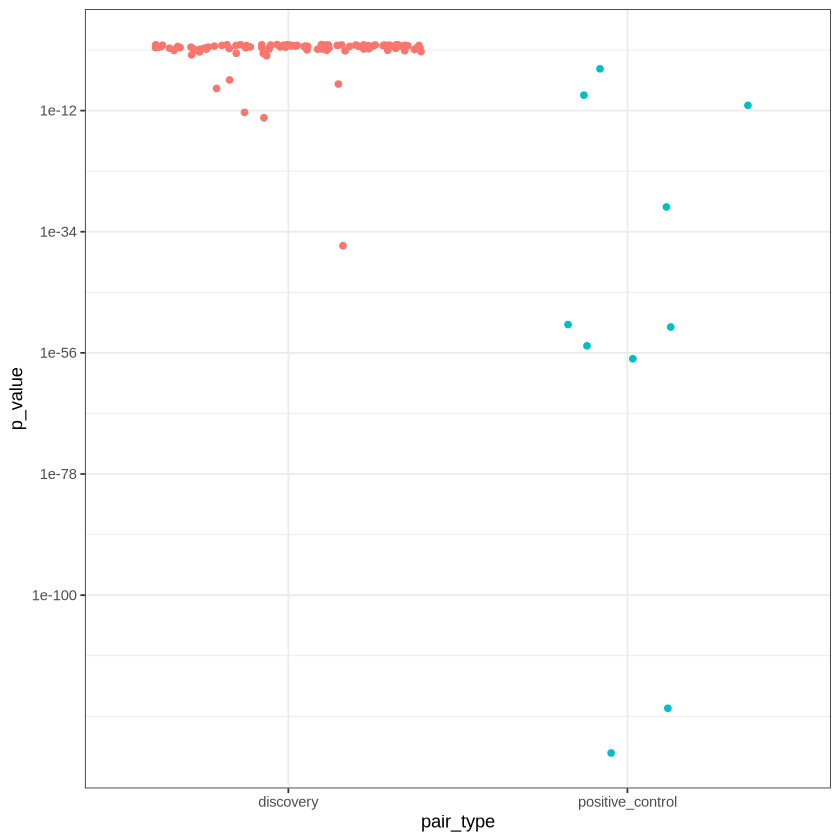

In [16]:
# Create a jitter plot of p-values by pair_type
MultiAssayExperiment::metadata(output_negbinom)$test_results |> 
    as.data.frame() |> 
    ggplot(aes(x = pair_type, color = pair_type, y = p_value)) + 
    geom_jitter() + 
    scale_y_log10() + 
    theme_bw() +
    theme(legend.position = "none")